## Mnist 데이터셋 분류

 - 70000장
 - 28 X 28
 
 1. 데이터로드 : keras.dataset 로드
 2. 데이터정제
     * training set / test set 분리
     * 이미지를 784 * 1 형태의 array로 변형
     * 정규화 : 0~1사이 값으로 바꿈
 3. 모델 생성
     * ReLU, Softmax
 4. 모델 컴파일
     * loss : CCEE
 5. 모델 학습

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical # one-hot keras encording
from keras.callbacks import EarlyStopping,ModelCheckpoint
# 데이터셋 로드
from keras.datasets import mnist

import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(3)
tf.random.set_seed(3)

## 1. 데이터 읽어오기

In [2]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

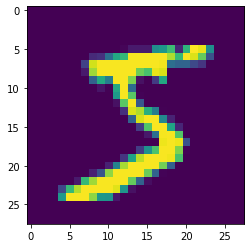

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

### 2. 데이터 전처리

### 문자열을 숫자로 변환
    - training set / test set 분리
    - 이미지를 784 * 1 형태의 array로 바꾸기
    - 정규화 : 0~1 사이의 값으로 바꾸기

In [4]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [5]:
X_train = X_train.reshape(X_train.shape[0],784).astype('float64')/255

In [6]:
# X_train = X_train.astype('float64')
# X_train = X_train/255

In [7]:
X_test = X_test.reshape(X_test.shape[0],784).astype('float64')/255

In [8]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train,10)
Y_test = np_utils.to_categorical(Y_test,10)

## 3. 모델 설계

In [32]:
model = Sequential()
model.add(Dense(77, input_dim=28*28, activation='relu'))
model.add(Dense(10,  activation='softmax'))

## 4. 모델 컴파일

In [33]:
model.compile(loss = 'categorical_crossentropy', optimizer = "Adam" ,metrics = ['accuracy'])  #optimizer = "adam" 으로 설정하면 xavier 초기화

## 5. 학습

In [34]:
# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

modelpath="./model/MNIST_last_weights.hdf5"

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [35]:
h = model.fit(X_train,Y_train, validation_split= 0.2, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])
print('\n Test Accuracy : %.4f' % (model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.25295, saving model to ./model/MNIST_last_weights.hdf5

Epoch 00002: val_loss improved from 0.25295 to 0.19181, saving model to ./model/MNIST_last_weights.hdf5

Epoch 00003: val_loss improved from 0.19181 to 0.16629, saving model to ./model/MNIST_last_weights.hdf5

Epoch 00004: val_loss improved from 0.16629 to 0.14854, saving model to ./model/MNIST_last_weights.hdf5

Epoch 00005: val_loss improved from 0.14854 to 0.13413, saving model to ./model/MNIST_last_weights.hdf5

Epoch 00006: val_loss improved from 0.13413 to 0.12443, saving model to ./model/MNIST_last_weights.hdf5

Epoch 00007: val_loss improved from 0.12443 to 0.12091, saving model to ./model/MNIST_last_weights.hdf5

Epoch 00008: val_loss improved from 0.12091 to 0.11464, saving model to ./model/MNIST_last_weights.hdf5

Epoch 00009: val_loss improved from 0.11464 to 0.11026, saving model to ./model/MNIST_last_weights.hdf5

Epoch 00010: val_loss improved from 0.11026 to 0.10656, sa

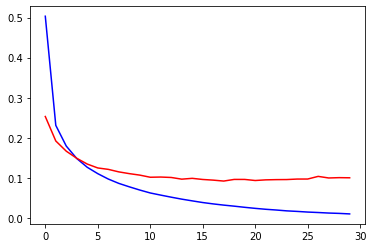

In [36]:
plt.plot(h.history['loss'],'b')
plt.plot(h.history['val_loss'],'r')
plt.show()

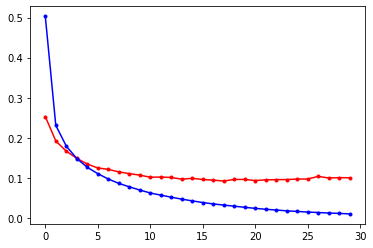

In [43]:
y_val_loss = h.history['val_loss']
y_loss = h.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len,y_val_loss,marker = '.',c="red",label = 'Testset_loss')
plt.plot(x_len,y_loss,marker = '.',c="blue",label = 'Trainset_loss')